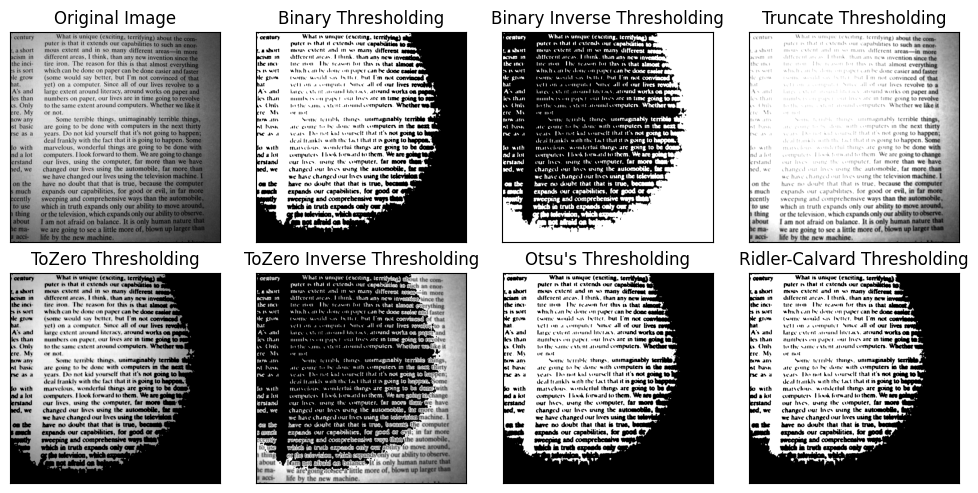

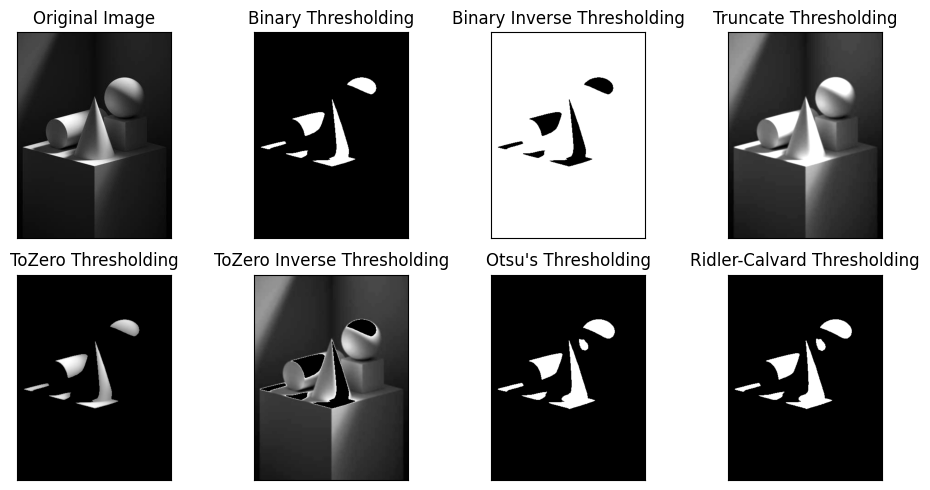

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load image paths
image_paths = ["./shadowed_text_2.jpg", "./shadowed_object_1.jpg"]

# Function to apply Gaussian filtering and thresholding methods
def process_and_threshold(image_path):
    img = cv2.imread(image_path, 0)
    blur = cv2.GaussianBlur(img, (5, 5), 0)

    def ridler_calvard_threshold(image):
        T_prev = np.mean(image)
        while True:
            G1 = image[image >= T_prev]
            G2 = image[image < T_prev]
            mu1 = np.mean(G1) if len(G1) > 0 else 0
            mu2 = np.mean(G2) if len(G2) > 0 else 0
            T_new = (mu1 + mu2) / 2
            if T_new == T_prev:
                break
            T_prev = T_new
        _, thresholded_image = cv2.threshold(image, T_new, 255, cv2.THRESH_BINARY)
        return thresholded_image

    # Define methods
    global_methods = [
        ("Binary Thresholding", cv2.THRESH_BINARY),
        ("Binary Inverse Thresholding", cv2.THRESH_BINARY_INV),
        ("Truncate Thresholding", cv2.THRESH_TRUNC),
        ("ToZero Thresholding", cv2.THRESH_TOZERO),
        ("ToZero Inverse Thresholding", cv2.THRESH_TOZERO_INV),
        ("Otsu's Thresholding", cv2.THRESH_BINARY + cv2.THRESH_OTSU),
        ("Ridler-Calvard Thresholding", ridler_calvard_threshold)
    ]

    # Apply global thresholding methods
    global_images = [img]
    global_titles = ["Original Image"]
    for title, method in global_methods:
        if title == "Ridler-Calvard Thresholding":
            th_img = method(blur)
        else:
            _, th_img = cv2.threshold(blur, 128, 255, method)
        global_images.append(th_img)
        global_titles.append(title)

    return global_images, global_titles

# Process each image and display the results
for image_path in image_paths:
    global_images, global_titles = process_and_threshold(image_path)

    plt.figure(figsize=(10, 5))  
    for i in range(len(global_images)):
        plt.subplot(2, 4, i+1)  
        plt.imshow(global_images[i], 'gray')
        plt.title(global_titles[i])
        plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()